* 텐서플로의 **Conv2D, MaxPooling2D, plot_model**을 활용

# Tensorflow

* **Conv2D**는 입력의 너비와 높이 방향의 합성곱 연산을 구현할 클래스이다.
  * 첫 번째 매개변수는 합성곱 필터의 개수이다. 
  * kernel_size 매개변수는 필터의 커널 크기를 지정한다. 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정할 수 있다. 일반적으로 커널의 가로세로 크기는 동일하다. 커널의 깊이는 입력의 깊이와 동일하기 때문에 따로 지정하지 않는다.
  * strides 매개변수는 필터의 이동 간격을 지정한다. 가로 세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정할 수 있다. 일반적으로 가로세로 스트라이드 크기는 동일한다. 기본값은 1이다. 
  * padding 매개변수는 입력의 패딩 타입을 지정한다. 기본값 'valid'는 패당을 하지 않는다. 'same'은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가한다. 
  * activation 매개변수는 합성곱 층에 적용할 활성화 함수를 지정한다. 

* **MaxPooling2D**는 입력의 너비와 높이를 줄이는 풀링 연산을 구현한 클래스이다. 
  * 첫 번째 매개변수는 풀리의 크기를 지정하며, 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정할 수 있다. 일반적으로 풀리의 가로세로 크기는 같게 지정한다. 
  * strides 매개변수는 풀링의 이동 간격을 지정한다. 기본값은 풀링의 크기와 동일하다. 즉 입력 위를 겹쳐서 풀링하지 않는다. 
  * padding 매개변수는 입력의 패딩 타입을 지정한다. 기본값 'valid'는 패딩을 하지 않는다. 'same'은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가한다. 

* **plot_model()**은 케라스 모델 구조를 주피터 노트북에 그리거나 파일로 저장한다. 
  * 첫 번째 매개변수에 케라스 모델 객체를 전달한다. 
  * to_file 매개변수에 파일 이름을 지정하면 그림을 파일로 저장한다. 
  * show_shapes 매개변수를 True로 지정하면 층의 입력, 출력 크기를 표시한다. 기본값은 False이다. 
  * show_layer_names 매개변수를 True로 지정하면 층 이름을 출력한다. 기본값이 True이다. 

# matplotlib

* **bar()**는 막대그래프를 출력한다. 
  * 첫 번째 매개변수에 x축의 값을 리스트나 넘파이 배열로 전달한다. 
  * 두 번째 매개변수에 막대의 y축 값을 리스트나 넘파이 배열로 전달한다. 
  * width 매개변수에서 막대의 두께를 지정할 수 있다. 기본값은 0.8이다. 

In [21]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [22]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

model.add(keras.layers.MaxPooling2D(2))

In [23]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [24]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

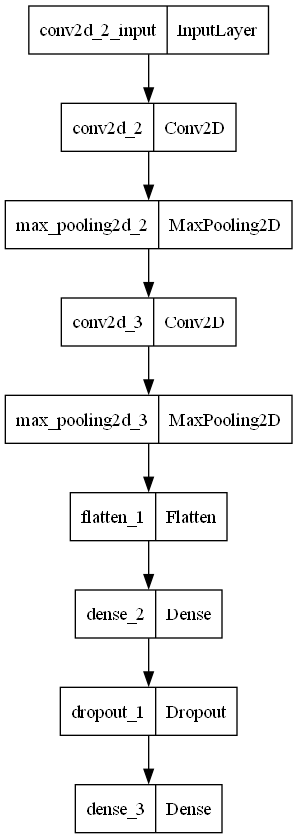

In [26]:
keras.utils.plot_model(model)

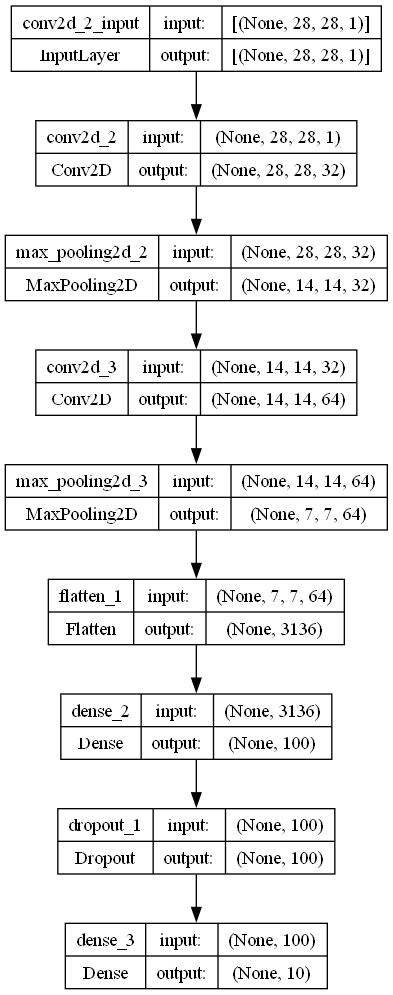

In [27]:
keras.utils.plot_model(model, show_shapes=True)

In [28]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5364 - accuracy: 0.8065 - val_loss: 0.3351 - val_accuracy: 0.8782
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3598 - accuracy: 0.8714 - val_loss: 0.2791 - val_accuracy: 0.8976
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3085 - accuracy: 0.8894 - val_loss: 0.2565 - val_accuracy: 0.9029
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2747 - accuracy: 0.8991 - val_loss: 0.2471 - val_accuracy: 0.9095
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2494 - accuracy: 0.9096 - val_loss: 0.2365 - val_accuracy: 0.9108
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2330 - accuracy: 0.9144 - val_loss: 0.2289 - val_accuracy: 0.9144
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2136 - accuracy: 0.9225 - val_loss: 0.2195 - val_accuracy:

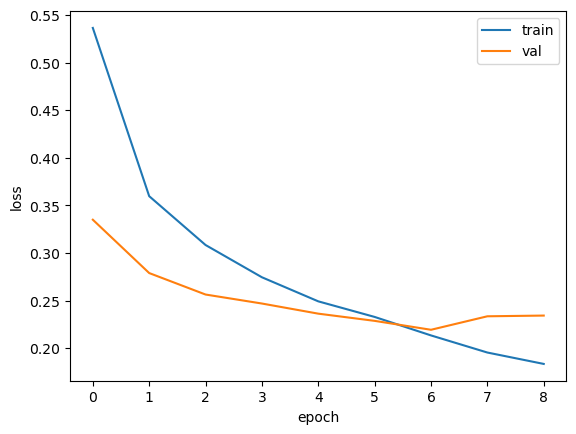

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [30]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2195 - accuracy: 0.9184


[0.21953783929347992, 0.9184166789054871]

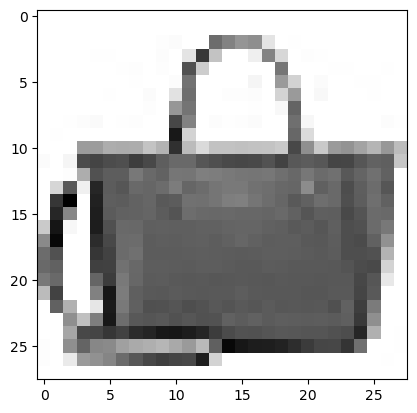

In [31]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [32]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 38ms/step
[[1.8008670e-15 7.3927753e-23 1.9250712e-18 3.0465122e-17 1.2499660e-18
  5.1134241e-17 1.0021161e-14 3.8557850e-16 1.0000000e+00 8.7601264e-18]]


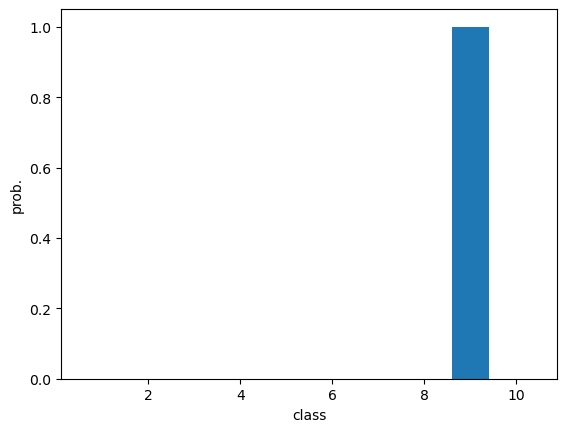

In [33]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [34]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [35]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [36]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [37]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2375 - accuracy: 0.9133


[0.2375158667564392, 0.9132999777793884]